# LeNet

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/CNN-Practicals')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/CNN-Practicals'

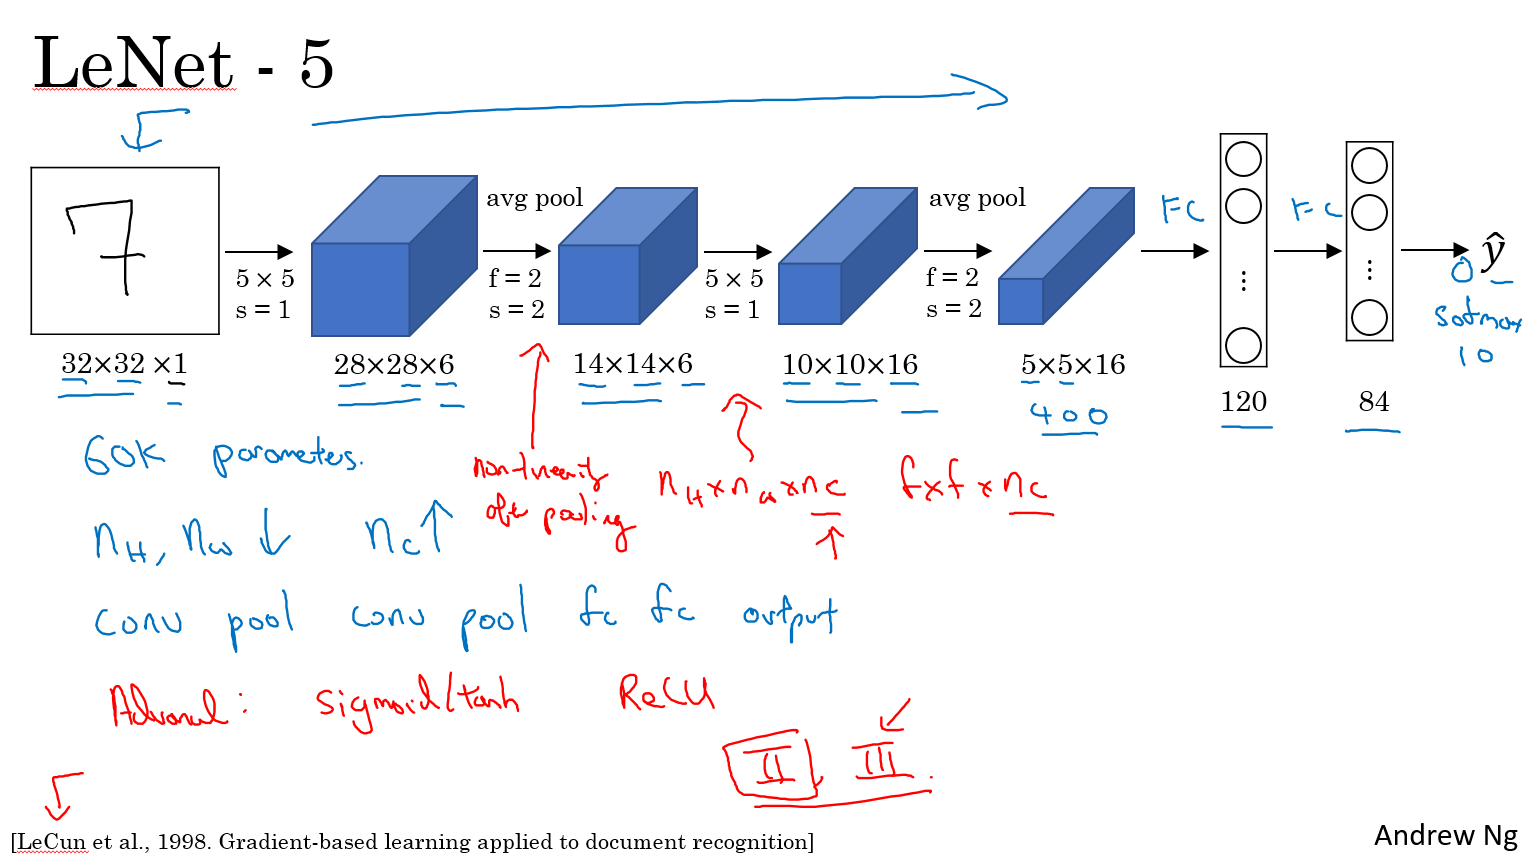

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/drive/My Drive/Colab Notebooks/CNN-Practicals/lenet.png"))

### Datasets and Pre Processing

In [ ]:
import keras
from keras.datasets import mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
3
uint8
3
uint8
3
uint8


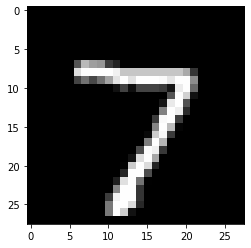

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='gray')

In [ ]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

60000
28
28


In [ ]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [ ]:
import numpy as np
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
9 9
0 0
33.318447
78.567444
2.8215446 2.8215446
-0.42407447 -0.42407447


In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
xtest =  xtest.reshape(xtest.shape[0],28,28,1)

In [ ]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[[[[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]]


 [[[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]]


 [[[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]]


 [[[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]]


 [[[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]]


 [[[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]]


 [[[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]]


 [[[0. 1.]
   [1. 0.]]

  [[1. 0.]
   [0. 1.]]]


 [[[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]]


 [[[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]]]


### LeNet Model

In [ ]:
import keras
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(32,32,1), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (3,3),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 16)        880       
_________________________________________________________________
average_pooling2d_15 (Averag (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 120)               69240     
_________________________________________________________________
dense_22 (Dense)             (None, 84)               

In [ ]:
"""
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))
"""

"\nmodel = keras.Sequential()\n\nmodel.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))\nmodel.add(layers.AveragePooling2D())\n\nmodel.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))\nmodel.add(layers.AveragePooling2D())\n\nmodel.add(layers.Flatten())\n\nmodel.add(layers.Dense(units=120, activation='relu'))\n\nmodel.add(layers.Dense(units=84, activation='relu'))\n\nmodel.add(layers.Dense(units=10, activation = 'softmax'))\n"

### Visualization of randomly initialized filters

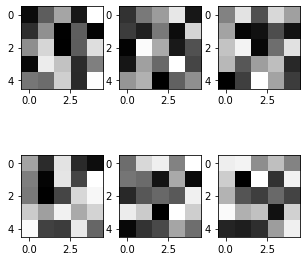

In [ ]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]

col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size):
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [ ]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[-1.67820737e-01 -6.34506345e-02  2.88904309e-02 -1.51873335e-01
   1.45088837e-01]
 [-1.22819610e-01  1.66463852e-03 -1.80479005e-01 -6.25217035e-02
  -1.78865761e-01]
 [-7.08550215e-05  9.25299674e-02 -1.82992712e-01 -6.32653087e-02
   1.02703854e-01]
 [-1.72699898e-01  1.20066449e-01  6.68572932e-02 -1.27019972e-01
  -1.91854686e-02]
 [-3.08558792e-02 -4.40799743e-02  8.34894031e-02 -1.28608376e-01
   1.41985342e-01]]

[[-0.10832807 -0.01131387  0.03633393  0.13997276 -0.14505777]
 [-0.09337356 -0.13171439 -0.01023784 -0.16095847  0.11492158]
 [-0.1732509   0.16652618  0.05607909 -0.1430348  -0.06585039]
 [-0.14756644  0.04250693 -0.0322995   0.17287295 -0.08259205]
 [ 0.02900313  0.06529202 -0.17774776 -0.04449481  0.0191347 ]]

[[ 0.02665524  0.14655955 -0.0335784   0.13201495  0.06421679]
 [ 0.06767948 -0.12678826 -0.11136817 -0.03818482 -0.10928392]
 [ 0.10759692  0.16573085 -0.12178345  0.00240299  0.1433519 ]
 [ 0.09358852 -0.02585469  0.06094977  0.10096969 -0.0826037 ]
 [-0

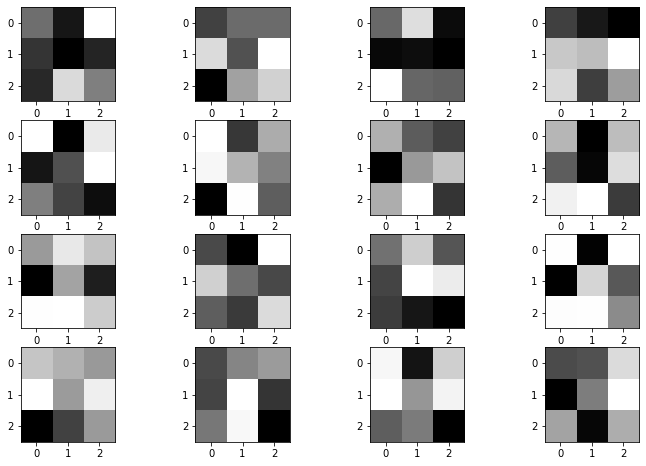

In [ ]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size):
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [ ]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[-0.03339733 -0.14198917  0.14742163]
 [-0.10589135 -0.17052875 -0.12337148]
 [-0.12078711  0.10097376 -0.01233119]]

[[-0.08286089 -0.03244159 -0.03256622]
 [ 0.09947348 -0.06342757  0.142712  ]
 [-0.15989572  0.03072007  0.08723107]]

[[ 7.3834062e-03  1.3034213e-01 -9.1158658e-02]
 [-9.3724146e-02 -8.8179924e-02 -1.0273087e-01]
 [ 1.6602588e-01  4.7537088e-03 -7.9065561e-05]]

[[-0.08108949 -0.12259409 -0.14799385]
 [ 0.06077978  0.04958774  0.11860117]
 [ 0.07854173 -0.08315565  0.01555574]]

[[ 0.17126837 -0.13029183  0.14561138]
 [-0.10548773 -0.03535147  0.17130238]
 [ 0.0199939  -0.05134035 -0.11471666]]

[[ 0.11546484 -0.1038501   0.0243174 ]
 [ 0.10611054  0.03237502 -0.023073  ]
 [-0.16436143  0.11392114 -0.06143853]]

[[ 0.05855413 -0.04222572 -0.07486366]
 [-0.1540235   0.03096159  0.08208063]
 [ 0.05419238  0.15372351 -0.08918501]]

[[ 6.7906499e-02 -7.0702113e-02  7.2565451e-02]
 [ 7.8856945e-05 -6.5530963e-02  9.7306430e-02]
 [ 1.1212492e-01  1.2325591e-01 -2.5541291e-

In [ ]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

### Compile and Training the model

In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks/CNN-Practicals')

print(os.getcwd())

from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

mc = ModelCheckpoint('CNN_MNIST.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

filepath = "saved-model-{epoch:02d}.h5"

#mc1 = ModelCheckpoint(filepath, monitor='val_loss', mode='min', verbose=1, save_best_only=True  ,period=10)

cv = keras.callbacks.CSVLogger('CNN_MNIST.csv', separator=',', append=False)

#rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.00)

#es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

/content/drive/My Drive/Colab Notebooks/CNN-Practicals


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [mc,cv],epochs=50, verbose=1)

Epoch 1/50


ValueError: ignored

### Evaluate

In [ ]:
model.evaluate(xtest,ytest)

10000/10000 [==============================] - 1s 52us/step


[0.06744991845279001, 0.9784]

### Prediction

In [ ]:
pred=model.predict(xtest[0].reshape(1,28,28,1))
print(pred)
print(pred.argmax())

[[1.4277692e-06 2.2973054e-05 3.8457107e-05 4.4120610e-05 3.4092200e-09
  7.2755107e-08 4.4989723e-15 9.9988556e-01 5.2288222e-08 7.2746716e-06]]
7


In [ ]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

10000/10000 [==============================] - 1s 56us/step
0.06744991845279001
0.9784


### Loss and Accuracy Curves

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(len(train_loss))

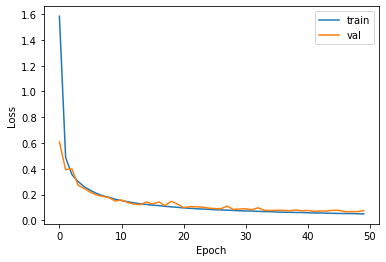

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

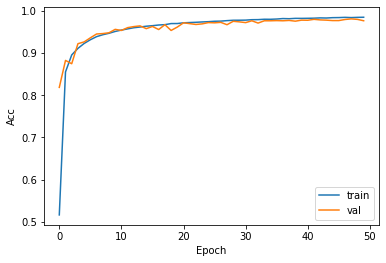

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [ ]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 28, 28, 1))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7
2 Actual is  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted is 2
3 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
4 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
5 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
6 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
7 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
8 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
9 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
10 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9


In [ ]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.99      0.98       980
     class 1       0.97      1.00      0.99      1135
     class 2       0.99      0.97      0.98      1032
     class 3       0.98      0.99      0.98      1010
     class 4       0.96      0.99      0.97       982
     class 5       0.98      0.98      0.98       892
     class 6       0.99      0.98      0.98       958
     class 7       0.97      0.98      0.97      1028
     class 8       0.99      0.95      0.97       974
     class 9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 968    0    1    0    3    1    2    2    2    1]
 [   0 1133    1    0    0    1    0    0    0    0]
 [   6   10  997    3    4    0    0    8    4    0]
 [   0    3    1  996    0    5    0    3    1    1]
 [   1    0    1    0  974    0    4    1    0    1]
 [   3    0    0    4    2  876    3    1    0    3]
 [   4    3    0    0    8    2  941    0    0    0]
 [   1    5    6    2    2    0    0 1008    0    4]
 [   6    4    1    8    5    6    3   12  926    3]
 [   1    6    1    3   18    6    0    9    0  965]]


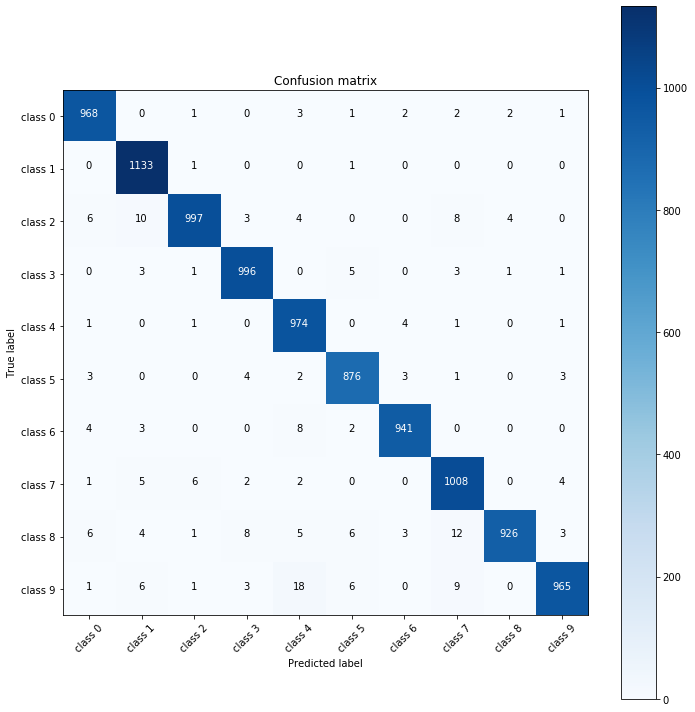

In [ ]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## Visualization

In [ ]:
for layer in model.layers:
  print(layer)

In [ ]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,28,28,1))

In [ ]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [ ]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

(1, 24, 24, 6)
(1, 12, 12, 6)
(1, 8, 8, 16)
(1, 4, 4, 16)
(1, 256)
(1, 120)
(1, 84)
(1, 10)


(1, 24, 24, 6)


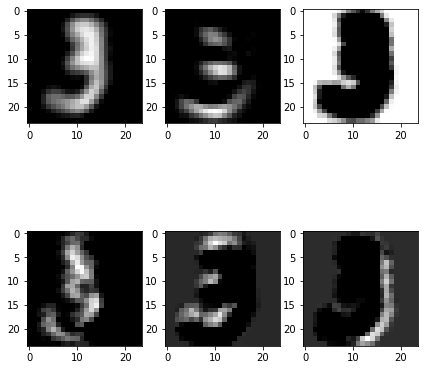

In [ ]:
print(activations[0].shape)
display_activation(activations,3,2,0)

(1, 12, 12, 6)


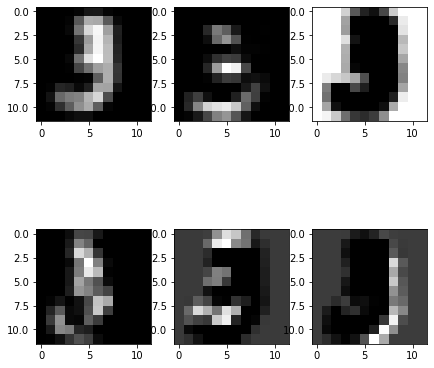

In [ ]:
print(activations[1].shape)
display_activation(activations,3,2,1)

(1, 8, 8, 16)


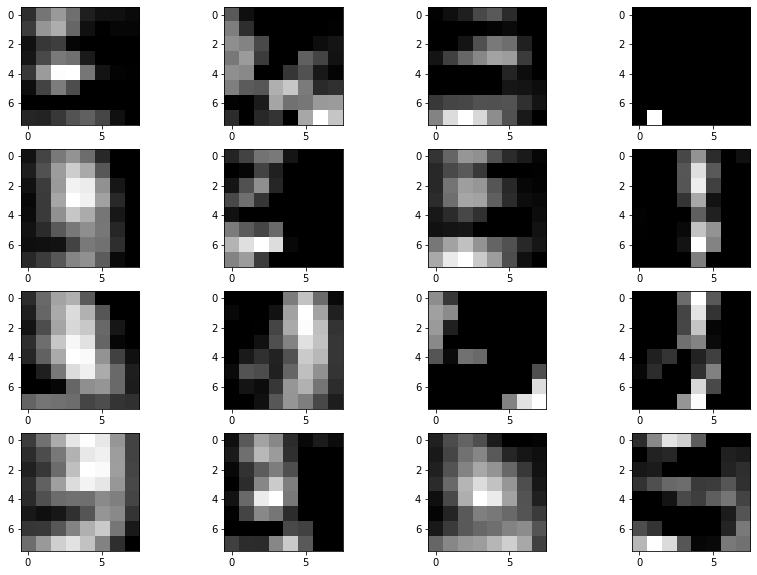

In [ ]:
print(activations[2].shape)
display_activation(activations,4,4,2)

(1, 4, 4, 16)


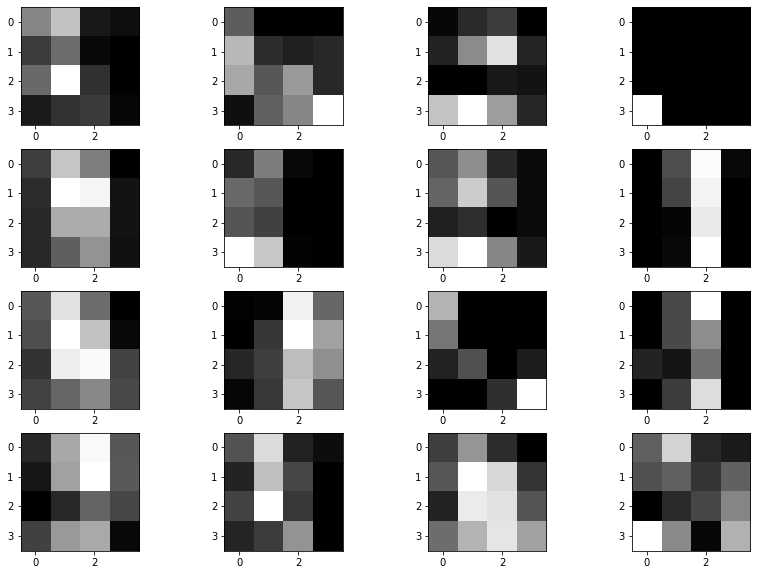

In [ ]:
print(activations[3].shape)
display_activation(activations,4,4,3)

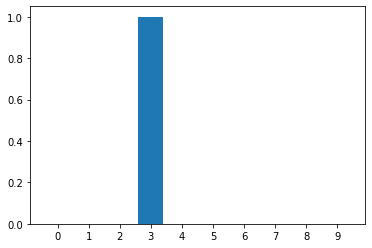

In [ ]:
act_dense_3  = activations[7]

y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

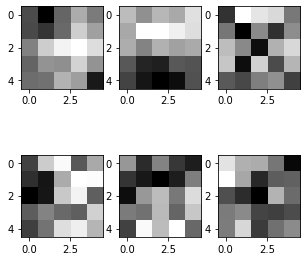

In [ ]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]

col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size):
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [ ]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[ 0.05 -0.19  0.13  0.35  0.2 ]
 [ 0.04 -0.02  0.14  0.46  0.31]
 [ 0.22  0.46  0.57  0.61  0.5 ]
 [ 0.13  0.28  0.26  0.47  0.28]
 [ 0.15  0.17  0.37  0.31 -0.11]]

[[ 0.25  0.06  0.23  0.17  0.41]
 [ 0.16  0.54  0.54  0.48  0.4 ]
 [ 0.19  0.    0.2   0.13  0.17]
 [-0.18 -0.41 -0.43 -0.18 -0.21]
 [-0.27 -0.47 -0.57 -0.51 -0.21]]

[[-0.22 -0.03 -0.05 -0.06 -0.15]
 [-0.16 -0.27 -0.14 -0.22 -0.13]
 [-0.09 -0.14 -0.25 -0.1  -0.07]
 [-0.08 -0.25 -0.07 -0.2  -0.1 ]
 [-0.18 -0.2  -0.15 -0.13 -0.21]]

[[-0.13  0.13  0.21 -0.09  0.06]
 [-0.17 -0.21  0.07  0.22  0.22]
 [-0.25 -0.21  0.12  0.2  -0.08]
 [-0.08 -0.01 -0.06 -0.08  0.14]
 [-0.14 -0.04  0.16  0.19  0.08]]

[[ 0.04 -0.18 -0.   -0.16 -0.21]
 [-0.16 -0.22 -0.27 -0.21 -0.01]
 [-0.24  0.04  0.11 -0.03  0.18]
 [-0.02 -0.04  0.11 -0.06  0.13]
 [-0.14  0.24  0.11  0.25 -0.06]]

[[ 0.17  0.08  0.07 -0.02 -0.21]
 [ 0.21  0.06 -0.15 -0.07 -0.06]
 [-0.09 -0.15 -0.23  0.08 -0.04]
 [-0.01  0.01 -0.11 -0.12 -0.09]
 [-0.01  0.14 -0.12 -0.03  0.01]]

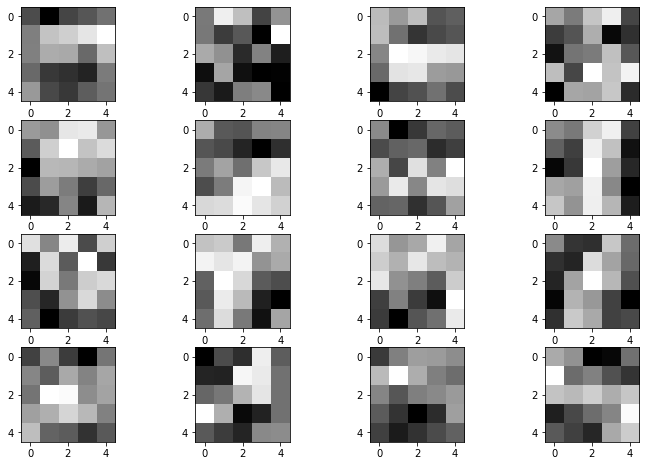

In [ ]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size):
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [ ]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[-0.08 -0.23 -0.09 -0.06 -0.  ]
 [ 0.02  0.16  0.18  0.22  0.28]
 [ 0.03  0.11  0.11 -0.02  0.15]
 [-0.02 -0.11 -0.13 -0.16  0.02]
 [ 0.07 -0.08 -0.11 -0.04  0.  ]]

[[ 0.01  0.12  0.08 -0.05  0.03]
 [ 0.01 -0.05 -0.03 -0.11  0.14]
 [ 0.06  0.03 -0.07  0.02 -0.08]
 [-0.1   0.05 -0.1  -0.11 -0.11]
 [-0.06 -0.09  0.01  0.02 -0.11]]

[[ 0.06  0.01  0.06 -0.09 -0.07]
 [ 0.06 -0.05 -0.13 -0.1  -0.09]
 [-0.02  0.16  0.15  0.13  0.12]
 [-0.06  0.12  0.12  0.01  0.01]
 [-0.21 -0.11 -0.09 -0.05 -0.1 ]]

[[-0.   -0.03  0.02  0.05 -0.06]
 [-0.07 -0.05  0.   -0.1  -0.08]
 [-0.1  -0.03 -0.03  0.02 -0.05]
 [ 0.02 -0.06  0.06  0.02  0.05]
 [-0.11 -0.   -0.    0.02 -0.08]]

[[ 0.08  0.06  0.18  0.19  0.07]
 [-0.01  0.15  0.22  0.14  0.17]
 [-0.14  0.12  0.12  0.1   0.09]
 [-0.03  0.08  0.04 -0.05  0.01]
 [-0.1  -0.08  0.05 -0.1   0.12]]

[[ 0.02 -0.08 -0.09 -0.03 -0.03]
 [-0.09 -0.1  -0.15 -0.2  -0.14]
 [-0.04  0.01 -0.06  0.06  0.1 ]
 [-0.1  -0.04  0.12  0.13  0.04]
 [ 0.08  0.08  0.12  0.09  0.07]]